## Semana de Data Science

In [1]:
import pandas as pd

In [3]:
df = pd.read_excel('carros_usados.xls')

In [4]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
data.set             7495 non-null object
total.cost           7495 non-null int64
lot.sale.days        7495 non-null int64
overage              7495 non-null object
mileage              7495 non-null int64
vehicle.type         7495 non-null object
domestic.import      7495 non-null object
vehicle.age          7495 non-null int64
vehicle.age.group    7495 non-null object
color.set            7495 non-null object
makex                7495 non-null object
state                7495 non-null object
make.model           7495 non-null object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [6]:
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


In [7]:
df.isnull().sum()

data.set             0
total.cost           0
lot.sale.days        0
overage              0
mileage              0
vehicle.type         0
domestic.import      0
vehicle.age          0
vehicle.age.group    0
color.set            0
makex                0
state                0
make.model           0
dtype: int64

Análise exploratória

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
plt.rcParams['figure.figsize'] = (10,7)

Definindo estilo

In [9]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Distribuição da coluna total.cost')

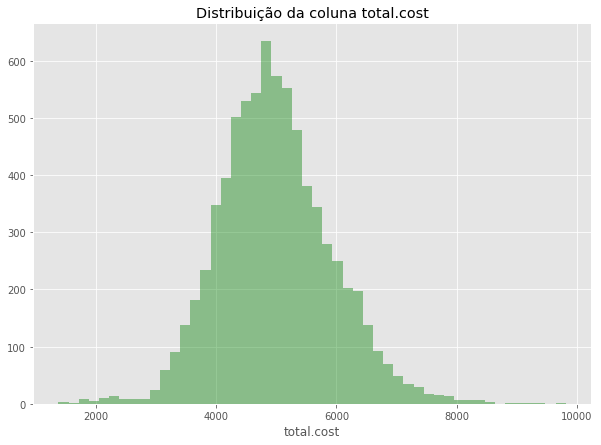

In [50]:
sns.distplot(df['total.cost'], color='green', kde=False)
plt.title('Distribuição da coluna total.cost')

Qual a quantidade média de dias que os carros ficam na concessionária?

Text(0.5, 1.0, 'Distribuição da coluna lot.sale.day')

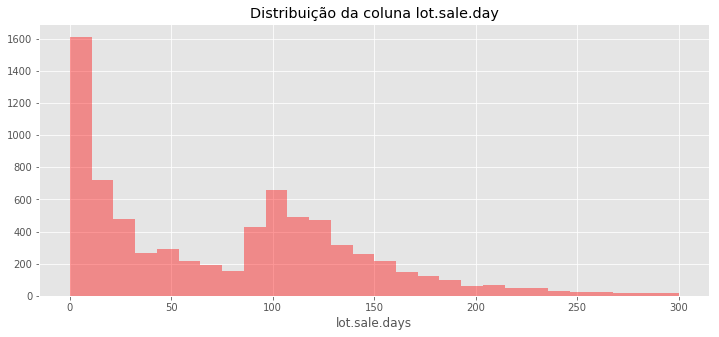

In [24]:
sns.distplot(df['lot.sale.days'], color='red', kde=False)
plt.title('Distribuição da coluna lot.sale.day')

Qual a kilometragem média dos veículos da concessionária?

Text(0.5, 1.0, 'Distribuição da coluna mileage')

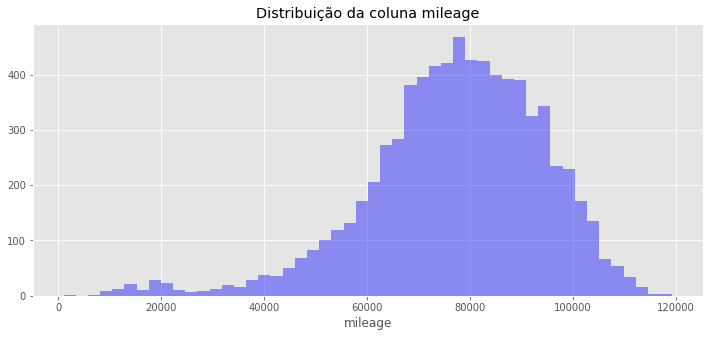

In [25]:
sns.distplot(df['mileage'], color='blue', kde=False)
plt.title('Distribuição da coluna mileage')

Qual a idade média dos veículos da concessionária?

Text(0.5, 1.0, 'Distribuição da coluna vehicle.age')

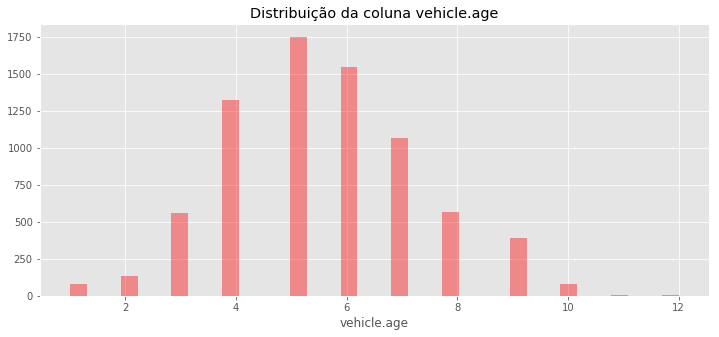

In [26]:
sns.distplot(df['vehicle.age'], color='red', kde=False)
plt.title('Distribuição da coluna vehicle.age')

Visualizando a correlação entre algumas variáveis

In [27]:
df[['mileage','vehicle.age','lot.sale.days','total.cost']].head()

,mileage,vehicle.age,lot.sale.days,total.cost
0,67341,8,135,4037
1,72823,6,114,6886
2,96330,9,205,3924
3,58519,4,100,4636
4,99057,4,129,5080


- Calculando a correlação com o método corr()

In [28]:
df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

,mileage,vehicle.age,lot.sale.days,total.cost
mileage,1.000000,0.462838,0.060003,-0.127258
vehicle.age,0.462838,1.000000,0.186480,-0.309716
lot.sale.days,0.060003,0.186480,1.000000,0.167632
total.cost,-0.127258,-0.309716,0.167632,1.000000


In [29]:
correlacoes = df[['mileage','vehicle.age','lot.sale.days','total.cost']].corr()

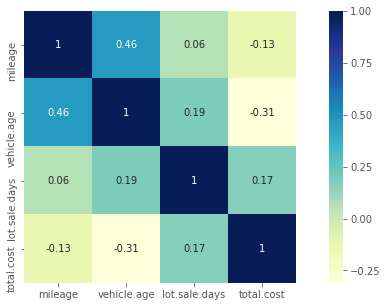

In [31]:
sns.heatmap(correlacoes, annot=True, cmap='YlGnBu', square=True)

Visualizando a disperssão entre os dias de vendas e algumas variáveis

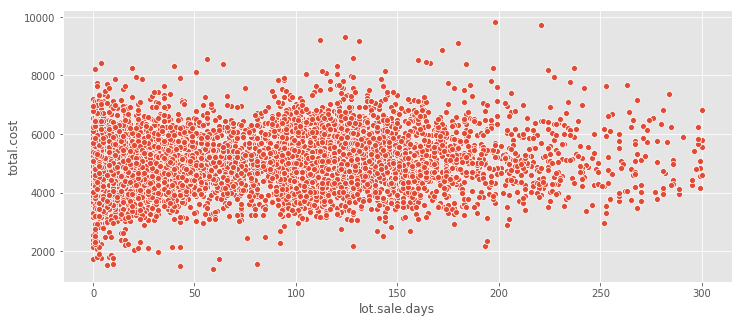

In [32]:
sns.scatterplot(x='lot.sale.days', y='total.cost', data=df)

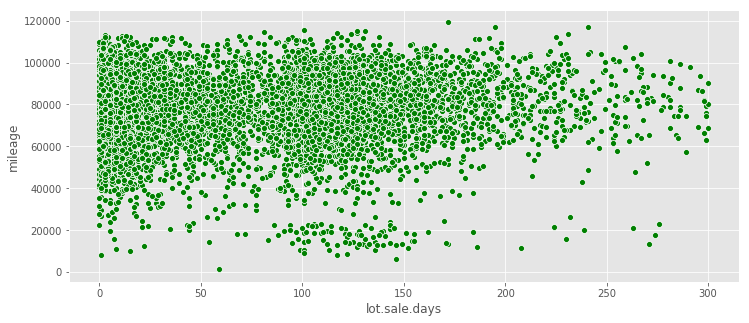

In [34]:
sns.scatterplot(x='lot.sale.days', y='mileage', data=df, color='green')

Tempo médio de vendas por tipos de Veículos

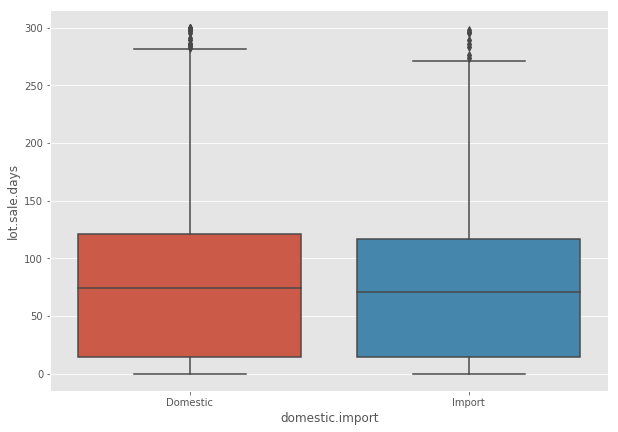

In [51]:
sns.boxplot(x='domestic.import', y='lot.sale.days', data=df)

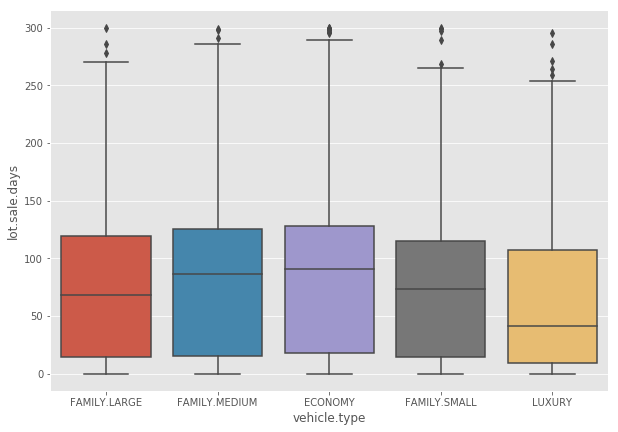

In [53]:
sns.boxplot(x='vehicle.type', y='lot.sale.days', data=df)

Tempo médio de vendas por cor de veículos

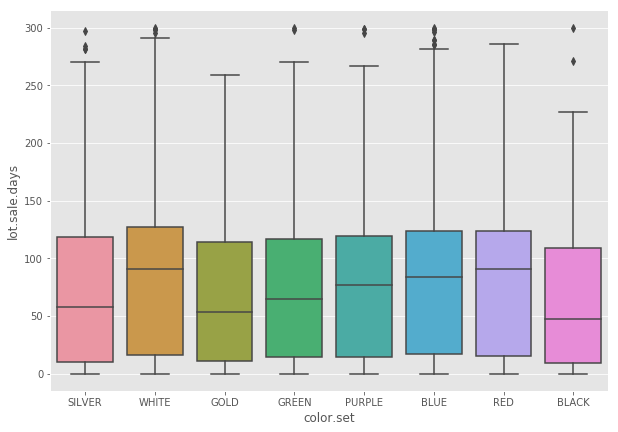

In [54]:
sns.boxplot(x='color.set', y='lot.sale.days', data=df)

Tempo médio de vendas por marca dos veículos

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

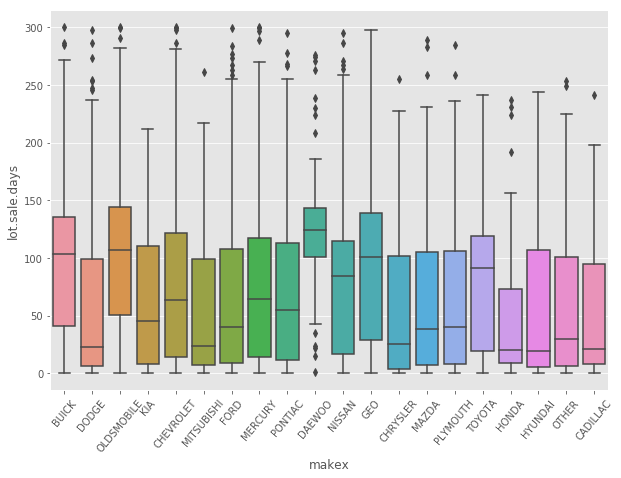

In [59]:
sns.boxplot(x='makex', y='lot.sale.days', data=df)
plt.xticks(rotation=50)

Tempo médio de vendas por estado

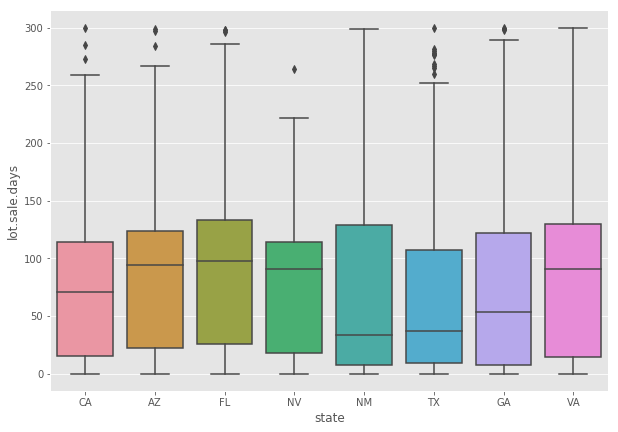

In [60]:
sns.boxplot(x='state', y='lot.sale.days', data=df)

**Construindo um Modelo de Machine Learning**

In [72]:
df.head(10)

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,1
1,6886,114,YES,72823,2,0,6,7,5,0,33
2,3924,205,YES,96330,2,0,9,7,15,2,77
3,4636,100,YES,58519,0,1,4,2,10,5,54
4,5080,129,YES,99057,2,0,4,3,15,5,77
5,4370,218,YES,82771,0,0,7,7,2,4,14
6,7578,128,YES,74255,2,1,5,7,13,5,65
7,5301,116,YES,82594,2,0,5,4,15,0,75
8,5531,100,YES,81167,1,0,5,7,6,2,38
9,5728,166,YES,80519,2,0,7,6,12,6,61


Removendo a coluna vehicle.age.group

In [65]:
df.drop(['vehicle.age.group','data.set'], axis=1, inplace=True)

Aplicando LabelEncoder para codificação de variáveis categóricas

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

Aplica o LabelEncoder nos dados categóricos

In [68]:
df['vehicle.type'] = label_encoder1.fit_transform(df['vehicle.type'])
df['domestic.import'] = label_encoder2.fit_transform(df['domestic.import'])
df['color.set'] = label_encoder3.fit_transform(df['color.set'])
df['makex'] = label_encoder4.fit_transform(df['makex'])
df['state'] = label_encoder5.fit_transform(df['state'])
df['make.model'] = label_encoder6.fit_transform(df['make.model'])

In [71]:
df.head(10)

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,1
1,6886,114,YES,72823,2,0,6,7,5,0,33
2,3924,205,YES,96330,2,0,9,7,15,2,77
3,4636,100,YES,58519,0,1,4,2,10,5,54
4,5080,129,YES,99057,2,0,4,3,15,5,77
5,4370,218,YES,82771,0,0,7,7,2,4,14
6,7578,128,YES,74255,2,1,5,7,13,5,65
7,5301,116,YES,82594,2,0,5,4,15,0,75
8,5531,100,YES,81167,1,0,5,7,6,2,38
9,5728,166,YES,80519,2,0,7,6,12,6,61
